In [0]:
#LOAD IN THE DATASETS AS DATAFRAMES FIRST (BEFORE CONVERTING THEM TO RDD STRUCTURES)

#LOADING IN THE CLINICAL_TRIAL_2019 DATASET

# File location and type - 2019
file_location1 = "dbfs:/FileStore/tables/clinicaltrial_2019.csv" 
file_type1 = "csv"

# CSV options
infer_schema1 = "false"
first_row_is_header1 = "true"
delimiter1 = "|"

# The applied options are for CSV files. For other file types, these will be ignored.
clinicaltrial_2019 = spark.read.format(file_type1) \
  .option("inferSchema", infer_schema1) \
  .option("header", first_row_is_header1) \
  .option("sep", delimiter1) \
  .load(file_location1)


#LOADING IN THE CLINICAL_TRIAL_2020 DATASET

# File location and type
file_location2 = "/FileStore/tables/clinicaltrial_2020.csv"
file_type2 = "csv"

# CSV options
infer_schema2 = "false"
first_row_is_header2 = "true"
delimiter2 = "|"

# The applied options are for CSV files. For other file types, these will be ignored.
clinicaltrial_2020 = spark.read.format(file_type2) \
  .option("inferSchema", infer_schema2) \
  .option("header", first_row_is_header2) \
  .option("sep", delimiter2) \
  .load(file_location2)

#LOADING IN THE CLINICAL_TRIAL_2021 DATASET

# File location and type
file_location3 = "/FileStore/tables/clinicaltrial_2021.csv"
file_type3 = "csv"

# CSV options
infer_schema3 = "false"
first_row_is_header3 = "true"
delimiter3 = "|"

# The applied options are for CSV files. For other file types, these will be ignored.
clinicaltrial_2021 = spark.read.format(file_type3) \
  .option("inferSchema", infer_schema3) \
  .option("header", first_row_is_header3) \
  .option("sep", delimiter3) \
  .load(file_location3)

#LOADING IN THE PHARMA DATASET

# File location and type
file_location4 = "/FileStore/tables/pharma.csv"
file_type4 = "csv"

# CSV options
infer_schema4 = "false"
first_row_is_header4 = "true"
delimiter4 = ","

# The applied options are for CSV files. For other file types, these will be ignored.
pharma = spark.read.format(file_type4) \
  .option("inferSchema", infer_schema4) \
  .option("header", first_row_is_header4) \
  .option("sep", delimiter4) \
  .load(file_location4)

#LOADING IN THE MESH DATASET

# File location and type
file_location5 = "/FileStore/tables/mesh.csv"
file_type5 = "csv"

# CSV options
infer_schema5 = "false"
first_row_is_header5 = "true"
delimiter5 = ","

# The applied options are for CSV files. For other file types, these will be ignored.
mesh = spark.read.format(file_type5) \
  .option("inferSchema", infer_schema5) \
  .option("header", first_row_is_header5) \
  .option("sep", delimiter5) \
  .load(file_location5)

In [0]:
#INITIALIZE A SPARK CONTEXT TO CREATE AN RDD ENVIRONMENT 
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.2.1 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#NEXT, CONVERT THE DATAFRAMES INTO RDD DATA STRUCTURES

rdd_2019 = clinicaltrial_2019.rdd
rdd_2020 = clinicaltrial_2020.rdd
rdd_2021 = clinicaltrial_2021.rdd
rdd_pharma = pharma.rdd
rdd_mesh = mesh.rdd

In [0]:
#IMPORT THE COLLECTIONS MODULE

import collections
from collections import defaultdict

In [0]:
#QUESTION 1: The number of studies in the dataset. You must ensure that you explicitly check distinct studies
print('The number of studies in 2019 dataset are: ')
print(rdd_2019.map(lambda x: x.Id).count())

print('The number of studies in 2020 dataset are: ')
rdd_2020 = clinicaltrial_2020.rdd
print(rdd_2020.map(lambda x: x.Id).count())

The number of studies in 2019 dataset are: 
326348
The number of studies in 2020 dataset are: 
356466


In [0]:

#QUESTION 2: You should list all the types (as contained in the Type column) of studies in the dataset along with
#the frequencies of each type. These should be ordered from most frequent to least frequent.

print('The types of studies in the 2019 dataset are: ')
print(rdd_2019.map(lambda x: x.Type).countByValue())

print('The types of studies in the 2020 dataset are: ')
print(rdd_2020.map(lambda x: x.Type).countByValue())



The types of studies in the 2019 dataset are: 
defaultdict(<class 'int'>, {'Interventional': 255945, 'Observational': 64163, 'Observational [Patient Registry]': 6171, 'Expanded Access': 69})
The types of studies in the 2020 dataset are: 
defaultdict(<class 'int'>, {'Interventional': 277631, 'Observational': 71434, 'Observational [Patient Registry]': 7332, 'Expanded Access': 69})


In [0]:
#QUESTION 3: The top 5 conditions (from Conditions) with their frequencies - (2019 DATASET)

print('The top 5 conditions in the 2019 dataset are: ')
conditions_2019 = rdd_2019.map(lambda x: x.Conditions).countByValue()
collections.OrderedDict(sorted(conditions_2019.items(), key=lambda kv: kv[1], reverse=True))


The top 5 conditions in the 2019 dataset are: 
Out[20]: OrderedDict([(None, 55285),
             ('Diabetes Mellitus', 6747),
             ('Breast Neoplasms', 5333),
             ('Prostatic Neoplasms', 3260),
             ('Carcinoma', 3095),
             ('Osteoarthritis', 2644),
             ('Lymphoma', 2417),
             ('Neoplasms', 2335),
             ('Asthma', 2224),
             ('Arthritis', 2216),
             ('Lung Neoplasms,Carcinoma', 2155),
             ('Leukemia', 2149),
             ('Heart Failure', 2146),
             ('Hypertension', 2083),
             ('Colorectal Neoplasms', 2052),
             ('Parkinson Disease', 1674),
             ('Pain', 1663),
             ('Lung Diseases,Pulmonary Disease', 1653),
             ('Stroke', 1582),
             ('Obesity', 1550),
             ('HIV Infections', 1465),
             ('Melanoma', 1380),
             ('Schizophrenia', 1373),
             ('Multiple Sclerosis,Sclerosis', 1371),
             ('Atrial Fibrill

In [0]:
#QUESTION 3: The top 5 conditions (from Conditions) with their frequencies - (2020 DATASET)

print('The top 5 conditions in the 2020 dataset are: ')
conditions_2020 = rdd_2020.map(lambda x: x.Conditions).countByValue()
collections.OrderedDict(sorted(conditions_2020.items(), key=lambda kv: kv[1], reverse=True))

The top 5 conditions in the 2020 dataset are: 
Out[21]: OrderedDict([(None, 60030),
             ('Diabetes Mellitus', 7096),
             ('Breast Neoplasms', 5664),
             ('Prostatic Neoplasms', 3484),
             ('Carcinoma', 3435),
             ('Osteoarthritis', 2857),
             ('Lymphoma', 2618),
             ('Neoplasms', 2596),
             ('Heart Failure', 2335),
             ('Arthritis', 2326),
             ('Lung Neoplasms,Carcinoma', 2301),
             ('Asthma', 2299),
             ('Leukemia', 2274),
             ('Colorectal Neoplasms', 2194),
             ('Hypertension', 2184),
             ('COVID-19', 2008),
             ('Pain', 1860),
             ('Parkinson Disease', 1814),
             ('Lung Diseases,Pulmonary Disease', 1726),
             ('Stroke', 1723),
             ('Obesity', 1626),
             ('HIV Infections', 1524),
             ('Atrial Fibrillation', 1486),
             ('Multiple Sclerosis,Sclerosis', 1481),
             ('Melanoma

In [0]:
# QUESTION 4:
#Each condition can be mapped to one or more hierarchy codes. The client wishes to know the 5
#most frequent roots (i.e. the sequence of letters and numbers before the first full stop) after this is done

codes_2019 = rdd_mesh.map(lambda x: (x.tree[0:3])).countByValue()
collections.OrderedDict(sorted(codes_2019 .items(), key=lambda kv: kv[1], reverse=True))


Out[25]: OrderedDict([('D12', 15700),
             ('D02', 13943),
             ('D03', 8215),
             ('B01', 4838),
             ('C10', 4464),
             ('D08', 4143),
             ('E05', 2951),
             ('C16', 2463),
             ('D04', 2453),
             ('C01', 2248),
             ('D23', 2242),
             ('C23', 2139),
             ('B03', 2084),
             ('C04', 1969),
             ('E01', 1934),
             ('D01', 1853),
             ('D27', 1808),
             ('E02', 1529),
             ('B04', 1503),
             ('N06', 1425),
             ('E04', 1402),
             ('G05', 1357),
             ('C14', 1303),
             ('A11', 1243),
             ('C18', 1220),
             ('I01', 1211),
             ('A08', 1188),
             ('D09', 1187),
             ('F01', 1163),
             ('J01', 1112),
             ('G07', 1011),
             ('D13', 1009),
             ('D10', 998),
             ('L01', 968),
             ('N02', 961),
            

In [0]:
# QUESTION 5:
# Find the 10 most common sponsors that are not pharmaceutical companies, along with the number
#of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the
#Parent Company column contains all possible pharmaceutical companies.

print('2019: \n')
a = rdd_2019.filter(lambda x: x.Sponsor == "National Cancer Institute (NCI)").count()
print(f"1. National Cancer Institute (NCI): {a}")
b = rdd_2019.filter(lambda x: x.Sponsor == "Merck Sharp & Dohme Corp.").count()
print(f"2. Merck Sharp & Dohme Corp.: {b}")
c = rdd_2019.filter(lambda x: x.Sponsor == "M.D. Anderson Cancer Center").count()
print(f"3. M.D. Anderson Cancer Center: {c}")
d = rdd_2019.filter(lambda x: x.Sponsor == "Mayo Clinic").count()
print(f"4. Mayo Clinic: {d}")
e = rdd_2019.filter(lambda x: x.Sponsor == "Novartis Pharmaceuticals").count()
print(f"5. Novartis Pharmaceuticals: {e}")
f = rdd_2019.filter(lambda x: x.Sponsor == "Assistance Publique - Hôpitaux de Paris").count()
print(f"6. Assistance Publique - Hôpitaux de Paris: {f}")
g = rdd_2019.filter(lambda x: x.Sponsor == "Massachusetts General Hospital").count()
print(f"7. Massachusetts General Hospital: {g}")
h = rdd_2019.filter(lambda x: x.Sponsor == "Hoffmann-La Roche").count()
print(f"8. Assiut University: {h}")
i = rdd_2019.filter(lambda x: x.Sponsor == "National Taiwan University Hospital").count()
print(f"9. Hoffmann-La Roche: {i}")
j = rdd_2019.filter(lambda x: x.Sponsor == "Eli Lilly and Company").count()
print(f"10. National Taiwan University Hospital: {j} \n")


print('2020: \n')
k = rdd_2020.filter(lambda x: x.Sponsor == "National Cancer Institute (NCI)").count()
print(f"1. National Cancer Institute (NCI): {k}")
l = rdd_2020.filter(lambda x: x.Sponsor == "Merck Sharp & Dohme Corp.").count()
print(f"2. Merck Sharp & Dohme Corp.: {l}")
m = rdd_2020.filter(lambda x: x.Sponsor == "M.D. Anderson Cancer Center").count()
print(f"3. M.D. Anderson Cancer Center: {m}")
n = rdd_2020.filter(lambda x: x.Sponsor == "Mayo Clinic").count()
print(f"4. Mayo Clinic: {n}")
o = rdd_2020.filter(lambda x: x.Sponsor == "Novartis Pharmaceuticals").count()
print(f"5. Novartis Pharmaceuticals: {o}")
p = rdd_2020.filter(lambda x: x.Sponsor == "Assistance Publique - Hôpitaux de Paris").count()
print(f"6. Assistance Publique - Hôpitaux de Paris: {p}")
q = rdd_2020.filter(lambda x: x.Sponsor == "Massachusetts General Hospital").count()
print(f"7. Massachusetts General Hospital: {q}")
r = rdd_2020.filter(lambda x: x.Sponsor == "Assiut University").count()
print(f"8. Assiut University: {r}")
s = rdd_2020.filter(lambda x: x.Sponsor == "Hoffmann-La Roche").count()
print(f"9. Hoffmann-La Roche: {s}")
t = rdd_2020.filter(lambda x: x.Sponsor == "National Taiwan University Hospital").count()
print(f"10. National Taiwan University Hospital: {t}\n")

2019: 

1. National Cancer Institute (NCI): 3003
2. Merck Sharp & Dohme Corp.: 2124
3. M.D. Anderson Cancer Center: 2097
4. Mayo Clinic: 1930
5. Novartis Pharmaceuticals: 1881
6. Assistance Publique - Hôpitaux de Paris: 1764
7. Massachusetts General Hospital: 1715
8. Assiut University: 1694
9. Hoffmann-La Roche: 1608
10. National Taiwan University Hospital: 1500 

2020: 

1. National Cancer Institute (NCI): 3100
2. Merck Sharp & Dohme Corp.: 2184
3. M.D. Anderson Cancer Center: 2238
4. Mayo Clinic: 2097
5. Novartis Pharmaceuticals: 1962
6. Assistance Publique - Hôpitaux de Paris: 2043
7. Massachusetts General Hospital: 1823
8. Assiut University: 1806
9. Hoffmann-La Roche: 1761
10. National Taiwan University Hospital: 1720



In [0]:
#QUESTION 6: Plot number of completed studies each month in a given year – for the submission dataset, the year
#is 2021. You need to include your visualization as well as a table of all the values you have plotted
#for each month.

print(f'2019 : \n')
jan_2019 = rdd_2021.filter(lambda x: x.Submission == "Jan 2019").count()
print(f"Jan 2019: {jan_2019}")
feb_2019 = rdd_2021.filter(lambda x: x.Submission == "Feb 2019").count()
print(f"Feb 2019: {feb_2019}")
mar_2019 = rdd_2021.filter(lambda x: x.Submission == "Mar 2019").count()
print(f"Mar 2019: {mar_2019}")
apr_2019 = rdd_2021.filter(lambda x: x.Submission == "Apr 2019").count()
print(f"Apr 2019: {apr_2019}")
may_2019 = rdd_2021.filter(lambda x: x.Submission == "May 2019").count()
print(f"May 2019: {may_2019}")
jun_2019 = rdd_2021.filter(lambda x: x.Submission == "Jun 2019").count()
print(f"Jun 2019: {jun_2019}")
jul_2019 = rdd_2021.filter(lambda x: x.Submission == "Jul 2019").count()
print(f"Jul 2019: {jul_2019}")
jan_2019 = rdd_2021.filter(lambda x: x.Submission == "Aug 2019").count()
print(f"Jan 2019: {jan_2019}")
sep_2019 = rdd_2021.filter(lambda x: x.Submission == "Sep 2019").count()
print(f"Sep 2019: {sep_2019}")
oct_2019 = rdd_2021.filter(lambda x: x.Submission == "Oct 2019").count()
print(f"Oct 2019: {oct_2019}")
nov_2019 = rdd_2021.filter(lambda x: x.Submission == "Nov 2019").count()
print(f"Nov 2019: {nov_2019}")
dec_2019 = rdd_2021.filter(lambda x: x.Submission == "Dec 2019").count()
print(f"Dec 2019: {dec_2019}")


print(f'2020 : \n')

jan_2020 = rdd_2021.filter(lambda x: x.Submission == "Jan 2020").count()
print(f"Jan 2020: {jan_2020}")
feb_2020 = rdd_2021.filter(lambda x: x.Submission == "Feb 2020").count()
print(f"Feb 2020: {feb_2020}")
mar_2020 = rdd_2021.filter(lambda x: x.Submission == "Mar 2020").count()
print(f"Mar 2020: {mar_2020}")
apr_2020 = rdd_2021.filter(lambda x: x.Submission == "Apr 2020").count()
print(f"Apr 2020: {apr_2020}")
may_2020 = rdd_2021.filter(lambda x: x.Submission == "May 2020").count()
print(f"May 2020: {may_2020}")
jun_2020 = rdd_2021.filter(lambda x: x.Submission == "Jun 2020").count()
print(f"Jun 2020: {jun_2020}")
jul_2020 = rdd_2021.filter(lambda x: x.Submission == "Jul 2020").count()
print(f"Jul 2020: {jul_2020}")
aug_2020 = rdd_2021.filter(lambda x: x.Submission == "Aug 2020").count()
print(f"Aug 2020: {aug_2020}")
sep_2020 = rdd_2021.filter(lambda x: x.Submission == "Sep 2020").count()
print(f"Sep 2020: {sep_2020}")
oct_2020 = rdd_2021.filter(lambda x: x.Submission == "Oct 2020").count()
print(f"Oct 2020: {oct_2020}")
nov_2020 = rdd_2021.filter(lambda x: x.Submission == "Nov 2020").count()
print(f"Nov 2020: {nov_2020}")
dec_2020 = rdd_2021.filter(lambda x: x.Submission == "Dec 2020").count()
print(f"Dec 2020: {dec_2020}")



2019 : 

Jan 2019: 2833
Feb 2019: 2447
Mar 2019: 2836
Apr 2019: 2799
May 2019: 2836
Jun 2019: 2411
Jul 2019: 2794
Jan 2019: 2476
Sep 2019: 2620
Oct 2019: 2905
Nov 2019: 2532
Dec 2019: 2455
2020 : 

Jan 2020: 2784
Feb 2020: 2828
Mar 2020: 2858
Apr 2020: 3214
May 2020: 3101
Jun 2020: 3232
Jul 2020: 3124
Aug 2020: 2973
Sep 2020: 3007
Oct 2020: 2952
Nov 2020: 2910
Dec 2020: 2862


root
 |-- Submission: string (nullable = true)
 |-- count: long (nullable = true)



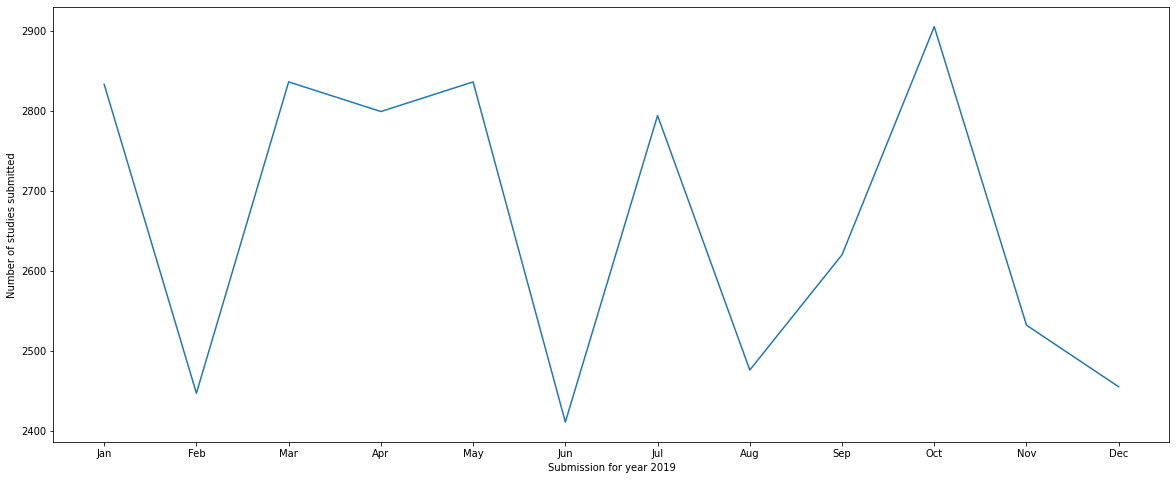

In [0]:
#Plot the submission results for the year 2019 (from the clinicaltrial_2021 dataset)

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("Jan",2833),
        ("Feb",2447),
        ("Mar",2836),
        ("Apr",2799),
        ("May",2836),
        ("Jun",2411),
        ("Jul",2794),
        ("Aug",2476),
        ("Sep", 2620),
        ("Oct", 2905),
        ("Nov", 2532),
        ("Dec", 2455)]

distData = sc.parallelize(data)

columns = ["Submission","count"]
sub_2019 = spark.createDataFrame(data = data, schema = columns)
sub_2019.printSchema()
sub_2019_df = sub_2019.toPandas()

#plot the line graph
plt.subplots(figsize=(20,8))
ax = sns.lineplot(x = "Submission", y = "count", data = sub_2019_df)
ax.set(xlabel='Submission for year 2019', ylabel='Number of studies submitted')
plt.show()

root
 |-- Submission: string (nullable = true)
 |-- count: long (nullable = true)



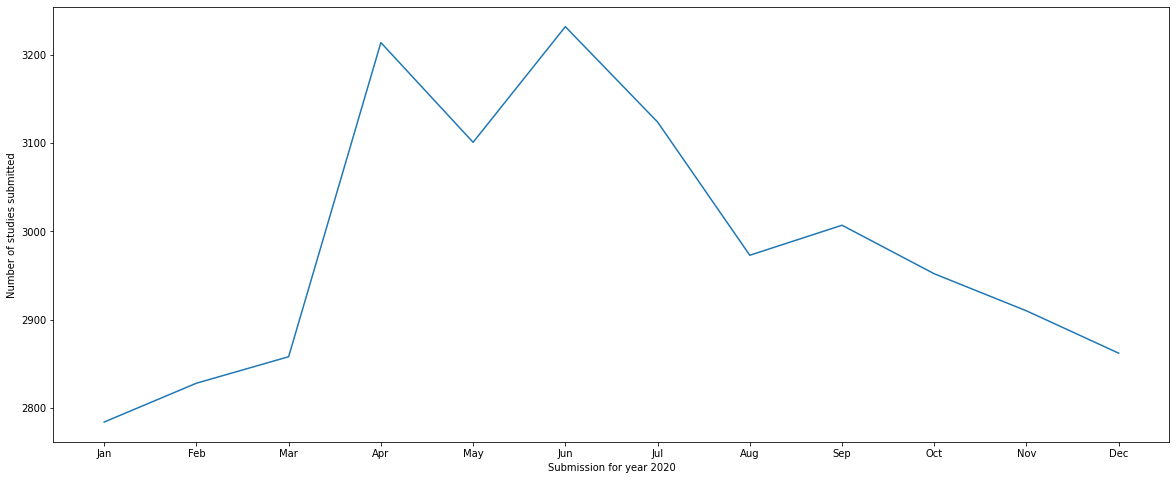

In [0]:
#Plot the submission results for the year 2020 (from the clinicaltrial_2021 dataset)

data_1 = [("Jan",2784),
        ("Feb",2828),
        ("Mar",2858),
        ("Apr",3214),
        ("May",3101),
        ("Jun",3232),
        ("Jul",3124),
        ("Aug",2973),
        ("Sep",3007),
        ("Oct",2952),
        ("Nov",2910),
        ("Dec",2862)]

distData = sc.parallelize(data)

columns = ["Submission","count"]
sub_2020 = spark.createDataFrame(data = data, schema = columns)
sub_2020.printSchema()
sub_2020_df = sub_2020.toPandas()

#plot the line graph
plt.subplots(figsize=(20,8))
ax_1 = sns.lineplot(x = "Submission", y = "count", data = sub_2020_df)
ax_1.set(xlabel='Submission for year 2020', ylabel='Number of studies submitted')
plt.show()